<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author Name: John Holliday 
Assignment Number: Project 2
Date: 2/7/2021 
Purpose: The purpose of this assignment is to look at the data and read from a CSV. The data contains information about recipes. All the different recipes have the attributes calories, fat, sodium, rating, protein, #cakeweek,	#wasteless, 22-minute meals, 3-ingredient recipes, etc. In this assignment we first prep the data then compute the pair-wise Pearson correlation. After that we perform PCA on the cleaned data and plot the elbow plot. We then create a logistic regression model to determine how well the model predicts 3-ingredient recipes. The final thing we do is create a new attribute called healthy. 

In [29]:
# mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
# read csv from Google Drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('gdrive/My Drive/epi_r.csv')

In [31]:
# Drop any outlier that contain calories over a thousand and drop the rows that are missing data.
df = df[df['calories'] < 10000].dropna()

# Only look at first ten columns as other columns aren't good data
df = df.iloc[:,:10]

# remove duplicates
df = df.drop_duplicates(keep=False)

# drop title attribute since not a number
df.drop(['title'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe00f649750>]],
      dtype=object)

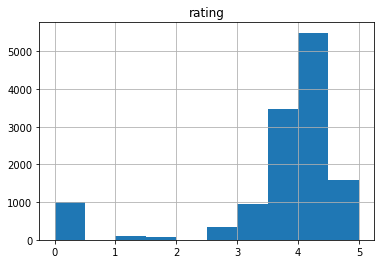

In [32]:
# plot histogram on attribute rating
pd.DataFrame(df['rating']).hist()

In [33]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes
count,13013.000000,13013.000000,13013.000000,13013.000000,13013.000000,13013.000000,13013.000000,13013.000000,13013.000000
mean,3.767386,519.894798,23.032736,29.600169,747.933759,0.000461,0.000077,0.001153,0.001537
std,1.257995,629.848325,43.985757,44.611350,3210.591772,0.021469,0.008766,0.033933,0.039175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,217.000000,4.000000,9.000000,100.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,364.000000,10.000000,19.000000,320.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,616.000000,30.000000,35.000000,763.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9831.000000,1625.000000,923.000000,132220.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Find correlations between rating attribute. We see that fat is the most correlated
corr_matrix = df.corr()
corr_matrix["rating"].sort_values(ascending=False)

rating                  1.000000
fat                     0.087280
protein                 0.086648
calories                0.075583
sodium                  0.021376
22-minute meals         0.019784
#wasteless              0.008590
#cakeweek               0.003260
3-ingredient recipes   -0.058047
Name: rating, dtype: float64

In [35]:
# transoform data into scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_df = scaler.transform(df)

scaled_df

array([[-1.00750411, -0.14908098,  0.15840426, ..., -0.00876654,
        -0.03397092, -0.03923379],
       [ 0.4830201 , -0.18559911, -0.11442181, ..., -0.00876654,
        -0.03397092, -0.03923379],
       [-0.0138213 , -0.56348238, -0.38724787, ..., -0.00876654,
        -0.03397092, -0.03923379],
       ...,
       [ 0.4830201 ,  0.06844006,  0.18113976, ..., -0.00876654,
        -0.03397092, -0.03923379],
       [ 0.4830201 ,  0.17640671,  0.49943684, ..., -0.00876654,
        -0.03397092, -0.03923379],
       [ 0.4830201 ,  0.06367683,  1.13603099, ..., -0.00876654,
        -0.03397092, -0.03923379]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe00fba9e50>,
      dtype=object)

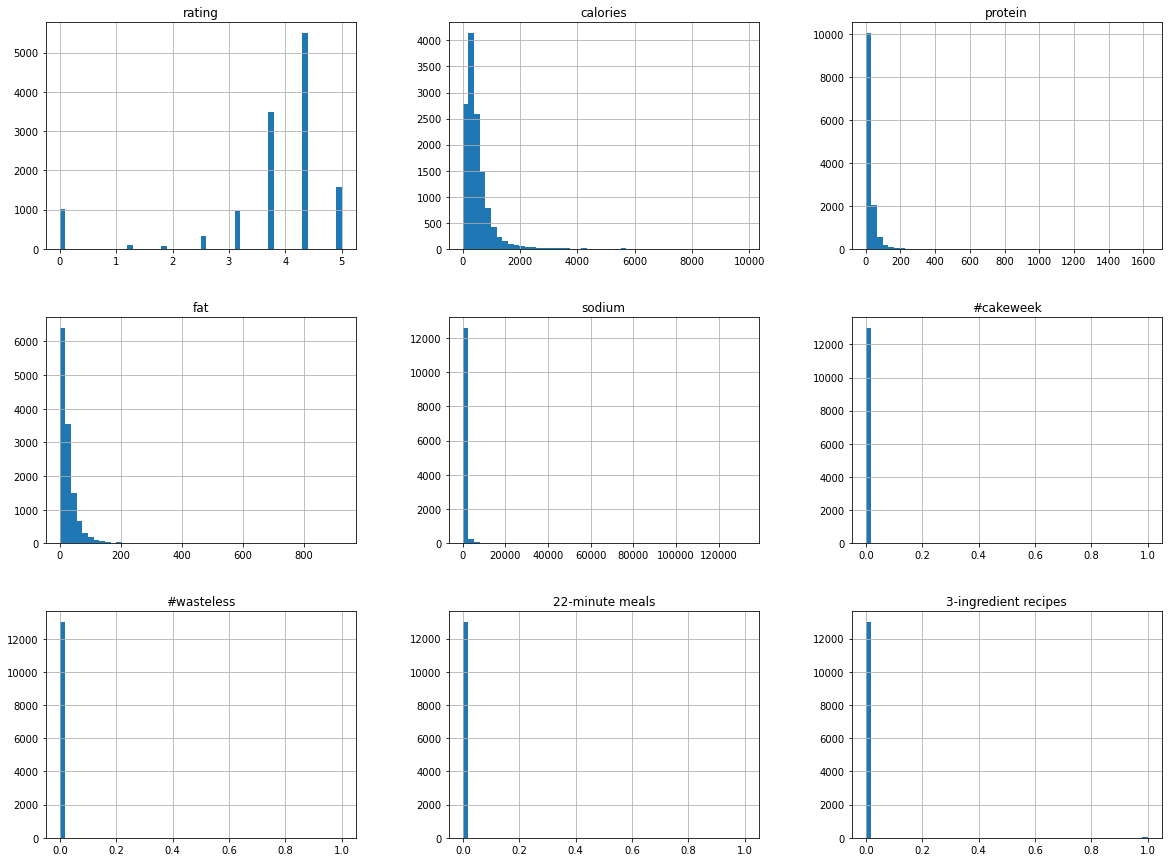

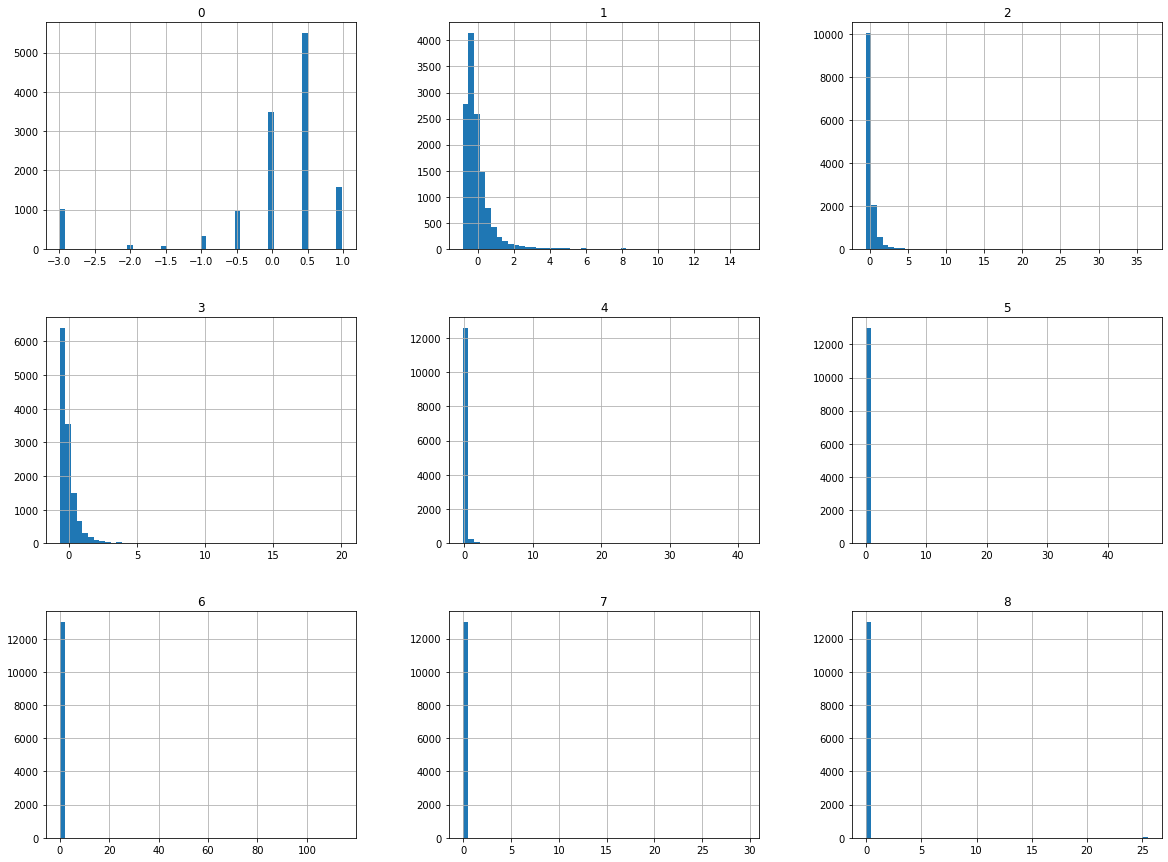

In [36]:
# plot histograms of attributes used
df.hist(bins=50, figsize=(20,15))

pd.DataFrame(scaled_df).hist(bins=50, figsize=(20,15))

In [37]:
from sklearn.decomposition import PCA

# Perform PCA by selecting the components that can explain 95% of variance
pca = PCA()
pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# transform the data to its top 95% variance principal components
x_pca2 = pca.transform(scaled_df)

In [38]:
print ('Scaled data shape: ', scaled_df.shape)
print ('Transformed data shape: ', x_pca2.shape)
print ('#Components explaining 95% of variance: ', d)

Scaled data shape:  (13013, 9)
Transformed data shape:  (13013, 9)
#Components explaining 95% of variance:  8


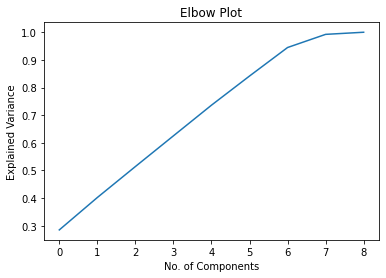

In [39]:
# Plots the elbow plot of the explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

In [40]:
# This part we split the data set and then we perform logistic regression
from sklearn.model_selection import train_test_split

# Set the x equal to the scaled data and y equal to the 3-ingredient recipes
# 3 ingredient recipes is either 1 or 0 with 1 being true and 0 being false
X = scaled_df
Y = df['3-ingredient recipes']

# We split the dataset into testing (30%) and training (70%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


# Next we perform logistic regression, if 1 it is 3-ingredient recipe if 0 then not
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

# Creates confusion matrix with 1 and 0
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('Number of total cases', X.shape)
print ('Number of training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

Number of total cases (13013, 9)
Number of training and testing cases (9109, 9) (3904, 9)
Confusion matrix:


,0,1
0,3898,0
1,0,6


In [41]:
# Next I created new attribute called healthy. If protein is greater than 15, calories is greater than 600, 
# and fat is less than 35 healthy is 1, if not healthy is 0
df["healthy"] = np.where(np.logical_and(np.logical_and(df["protein"] > 15, df["calories"] < 600), df["fat"] < 35), 1, 0)
df

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,healthy
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,1
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,1
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,1
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0


In [42]:
# Show correlation matrix with new atttribute of healthy
corr_matrix = df.corr()
corr_matrix["rating"].sort_values(ascending=False)

rating                  1.000000
fat                     0.087280
protein                 0.086648
calories                0.075583
healthy                 0.046619
sodium                  0.021376
22-minute meals         0.019784
#wasteless              0.008590
#cakeweek               0.003260
3-ingredient recipes   -0.058047
Name: rating, dtype: float64

In [43]:
# Rescale df after adding healthy attribute
scaler = StandardScaler()
scaler.fit(df)

scaled_df = scaler.transform(df)

scaled_df

array([[-1.00750411, -0.14908098,  0.15840426, ..., -0.03397092,
        -0.03923379,  2.34659328],
       [ 0.4830201 , -0.18559911, -0.11442181, ..., -0.03397092,
        -0.03923379,  2.34659328],
       [-0.0138213 , -0.56348238, -0.38724787, ..., -0.03397092,
        -0.03923379, -0.42614969],
       ...,
       [ 0.4830201 ,  0.06844006,  0.18113976, ..., -0.03397092,
        -0.03923379, -0.42614969],
       [ 0.4830201 ,  0.17640671,  0.49943684, ..., -0.03397092,
        -0.03923379, -0.42614969],
       [ 0.4830201 ,  0.06367683,  1.13603099, ..., -0.03397092,
        -0.03923379,  2.34659328]])

In [44]:
# Performs logistic regression again with new attribute healthy
X = scaled_df
Y = df['3-ingredient recipes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('Number of total cases', X.shape)
print ('Number of training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

Number of total cases (13013, 10)
Number of training and testing cases (9109, 10) (3904, 10)
Confusion matrix:


,0,1
0,3898,0
1,0,6
